# Part 2

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


### Generate some house sizes between 1000 and 3500

In [3]:
num_house = 160
np.random.seed(42)
house_size = np.random.randint(low=1000, high=3500, size=num_house)

### Generate house prices from house size with a random noise added

In [4]:
np.random.seed(42)
house_price = house_size * 100.0 + np.random.randint(low=2000, high=70000, size=num_house)

### Plot generated house and size

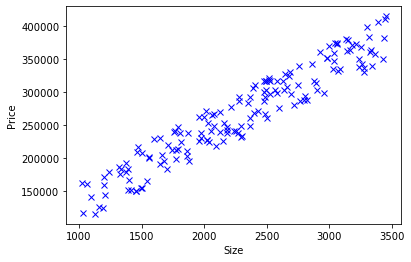

In [5]:
# bx = blue
plt.plot(house_size, house_price, "bx")
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

#### Concept
* Prepared Data
* Inference
* Loss Measurement
* Optimizer to Minimalize Loss
#### Implementation
* Generated house size and price data
* Price = (sizeFactor * size) + priceOffset
* Mean Square Error
* Gradient Descent Optimizer

### Normalize values to prevent under/overflows

In [6]:
def normalize(array):
    return (array - array.mean()) / array.std()

### Splitting to training / testing

In [7]:
num_train_samples = math.floor(num_house * 0.7)

### Define training data

In [8]:
train_house_size = np.asarray(house_size[:num_train_samples])
train_price = np.asanyarray(house_price[:num_train_samples:])

train_house_size_norm = normalize(train_house_size)
train_price_norm = normalize(train_price)

### Define testing data

In [9]:
test_house_size = np.array(house_size[num_train_samples:])
test_house_price = np.array(house_price[num_train_samples:])

test_house_size_norm = normalize(test_house_size)
test_price_norm = normalize(test_house_price)

## Tensor Types
* Constant - Constant Value
* Variable - Values adjusted in graph
* Placeholder - Used to pass data into graph

### Set up the TensorFlow placeholders that get updated as we descend down the gradient

In [10]:
tf_house_size = tf.placeholder("float", name="house_size")
tf_price = tf.placeholder("float", name="price")

### Define the variables holding the size_factor and price we set during training
#### We initialize them to some random values based on the normal distribution

In [11]:
tf_size_factor = tf.Variable(np.random.randn(), name="size_factor")
tf_price_offset = tf.Variable(np.random.randn(), name="price_offset")

### Define the operations for predicting values

In [12]:
tf_price_pred = tf.add(tf.multiply(tf_size_factor, tf_house_size), tf_price_offset)

### Define the Loss Function - MSE

In [13]:
tf_cost = tf.reduce_sum(tf.pow(tf_price_pred - tf_price, 2)) / (2 * num_train_samples)

### Optimizer learning rate. The size of the steps down the gradient

In [14]:
learning_rate = 0.1

### Define a Gradient Descent Optimizer that will minimize the loss defined in the operation

In [15]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

### Initializing the variables

In [16]:
init = tf.global_variables_initializer()

### Launch the graph in the session

In [17]:
with tf.Session() as sess:
    sess.run(init)
    
    display_every = 2
    num_training_iter = 50
    
#     keep iterating the training data
    for iteration in range(num_training_iter):
        
#         fit all training data
        for (x, y) in zip(train_house_size_norm, train_price_norm):
            sess.run(optimizer, feed_dict={tf_house_size: x, tf_price: y})
            
#             display current status
        if (iteration + 1) % display_every == 0:
            c = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size, tf_price: train_price_norm})
            print("iteration #:", '%04d' % (iteration + 1), "cost=", "{:.9f}".format(c), \
                  "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset))
        
    print("Optmisization Finished!")
    training_cost = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price: train_price_norm})
    print("Trained cost=", training_cost, "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset), '\n')
    
#     Plot of training and test data, and learned regression
#     Get values used to normalized data so we can denormalize data back to its original scale
    train_house_size_mean = train_house_size.mean()
    train_house_size_std = train_house_size.std()
    
    train_price_mean = train_price.mean()
    train_price_std = train_price.std()
    
#     Plot the graph
    plt.rcParams["figure.figsize"] = (10,8)
    plt.figure()
    plt.ylabel("Price")
    plt.xlabel("Size (sq.ft)")
    plt.plot(train_house_size, train_price, 'go', label="Training data")
    plt.plot(test_house_size, test_house_price, 'mo', label="Testing data")
    plt.plot(train_house_size_norm * train_house_size_std + train_house_size_mean,
            (sess.run(tf_size_factor) * train_house_size_norm + sess.run(tf_price_offset)) * train_price_std + train_price_mean,
            label="Learned Regression")
    plt.legend(loc="upper left")
    plt.show()

InternalError: cudaGetDevice() failed. Status: cudaGetErrorString symbol not found.

## Tensor Properties
### Dimensionality of a Tensor
#### Rank
* Rank 0 - Scalar -> 145
* Rank 1 - Vector -> v = [1,3,2,5,7]
* Rank 2 - Matrix -> m = [[1,2,3],[1,3,4,5]]
* Rank 3 - 3-Tensor -> c = [[[1,5,6], [5,3,4]], [[1,5,6], [5,3,4]]], [[1,5,6], [5,3,4]]]]
#### Shape
Shape of data in Tensor. Related to Rank
* Rank 0 - Scalar -> 145 -> []
* Rank 1 - Vector -> v = [1,3,2,5,7] -> [5]
* Rank 2 - Matrix -> m = [[1,2,3],[1,3,4]] -> [2,3]
* Rank 3 - 3-Tensor -> c = [[[1,5,6], [5,3,4]], [[1,5,6], [5,3,4]]], [[1,5,6], [5,3,4]]]] -> [3,2,3]
#### DataType
* float32, float64
* int8, int16, int32, int64
* uint8, uint16
* string
* bool
* complex65, complex128
* qint8, qint16, quint8

Quantitized values -> Scaled to reduce size, Processed faster`

### Methods


* get_shape() - Returns Shape
* reshape() - Changes shape
* rank - Returns rank
* dtype - Returns data type
* cast - Change data type

## Gradient Descend

In [18]:
with tf.Session() as sess:
    sess.run(init)
    
    display_every = 2
    num_training_iter = 50
    
#     calculate the number of lines to animation
    fit_num_plots = math.floor(num_training_iter / display_every)
    
#     add storage of factor and offset values from each epoch
    fit_size_factor = np.zeros(fit_num_plots)
    fit_price_offsets = np.zeros(fit_num_plots)
    fit_plot_idx = 0
    
#     keep iterating the training data
    for iteration in range(num_training_iter):
        
#         fit all training data
        for (x, y) in zip(train_house_size_norm, train_price_norm):
            sess.run(optimizer, feed_dict={tf_house_size: x, tf_price: y})
            
#             display current status
        if (iteration + 1) % display_every == 0:
            c = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size, tf_price: train_price_norm})
            print("iteration #:", '%04d' % (iteration + 1), "cost=", "{:.9f}".format(c), \
                  "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset))
            
        
#             save the fit size_factor and price_offset to allow animation of learning process
            fit_size_factor[fit_plot_idx] = sess.run(tf_size_factor)
            fit_price_offsets[fit_plot_idx] = sess.run(tf_price_offset)
            fit_plot_idx = fit_plot_idx + 1
        
    print("Optmisization Finished!")
    training_cost = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price: train_price_norm})
    print("Trained cost=", training_cost, "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset), '\n')
    
#     plot of training and test data, and learned regression
#     get values used to normalized data so we can denormalize data back to its original scale
    train_house_size_mean = train_house_size.mean()
    train_house_size_std = train_house_size.std()
    
    train_price_mean = train_price.mean()
    train_price_std = train_price.std()
    
#     plot another graph that shows the animation of how gradient descend sequentually adjusted size_factor and price_offset to find the values that returned the "best" fit line
    fig, ax = plt.subplots()
    line, = ax.plot(house_size, house_price)
    plt.rcParams["figure.figsize"] = (10,8)
    plt.title("Gradient Descent Fitting Regression Line")
    plt.ylabel("Price")
    plt.xlabel("Size (sq.ft)")
    plt.plot(train_house_size, train_price, 'go', label="Training data")
    plt.plot(test_house_size, test_house_price, 'mo', label="Testing data")
    
    def animate(i):
        line.set_xdata(train_house_size_norm * train_house_size_std + train_house_size_mean)
        line.set_ydata((fit_size_factor[i] * train_house_size_norm + fit_price_offsets[i]) * train_price_std + train_price_mean)
        return line,
    
#     init only for blitting to give clean state
    def initAnim():
        line.set_ydata(np.zeros(shape=house_price.shape[0]))
        return line,
    
    ani = animation.FuncAnimation(fig, animate, frames=np.arange(0, fit_plot_idx), init_func=initAnim,
                                 interval=1000, blit=True)

    plt.show()
    

InternalError: cudaGetDevice() failed. Status: cudaGetErrorString symbol not found.